<a href="https://colab.research.google.com/github/nabigwaku/project/blob/master/Sales_and_Repayment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This analysis aims to explore and understand the trends and patterns in sales and repayments. The objectives are:
- To identify key factors affecting sales and repayments.
- To understand the relationships between sales and repayments.
- To provide actionable insights for decision-making.


### Uploading the Dataset

In [ ]:
# @title
# Uploading the dataset into colab
from google.colab import files

file_uploaded = files.upload()

Saving gogo_sales_data.xlsx to gogo_sales_data (1).xlsx


### Importing Libraries

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('gogo_sales_data.xlsx')


### Dataset Overview
The dataset appears to be clean and well-structured, with no missing values in any of the columns. Dataset has 2000 entries, and 7 columns:
*   date_of_sales is a datetime type,
*   payment_expected,payment_actual and is_late_to_pay are interger fields
*   while make, model and branch are strings

In [ ]:
# @title
# Display the first few rows of the dataset
data.head()

,make,model,branch,date_of_sale,is_late_to_pay,payment_expected,payment_actual
0,Boxer,BM 150,Nairobi,2021-01-06,0,95394,95394
1,TVS,HLX 100CC ES PLUS,Bungoma,2021-04-22,0,102784,102784
2,TVS,HLX 100CC KS,Bungoma,2021-02-26,0,82295,82295
3,TVS,HLX 150CC (5 Gears),Nairobi,2021-03-26,0,93586,93586
4,TVS,HLX 150X (5 Gears),Mombasa,2021-06-05,0,135065,135065


In [ ]:
# @title
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   make              2000 non-null   object        
 1   model             2000 non-null   object        
 2   branch            2000 non-null   object        
 3   date_of_sale      2000 non-null   datetime64[ns]
 4   is_late_to_pay    2000 non-null   int64         
 5   payment_expected  2000 non-null   int64         
 6   payment_actual    2000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 109.5+ KB


## Calculating key metrics

In [ ]:
# @title
# Calculating key metrics or measures
total_sales = len(data)
total_revenue = data['payment_actual'].sum()
late_payment_rate = (data['is_late_to_pay'].sum() / total_sales) * 100

# calculating amount delayed
# > formula: payment_delay = payment_expected - payment_actual
data['payment_delay'] = data['payment_expected'] - data['payment_actual']
avg_payment_delay = data['payment_delay'].mean()

# outputing the results
print(f'''
Below are the key findings:

    1. Total Sales: {total_sales}
    2. Total Revenue: {total_revenue}
    3. Late Payment Rate: {late_payment_rate}
    4. Average Payment Delay: {avg_payment_delay}
''')



Below are the key findings:

    1. Total Sales: 2000
    2. Total Revenue: 182393629
    3. Late Payment Rate: 11.1
    4. Average Payment Delay: 9534.5385



## Deep Dive into the Key Metrics

### **1**. Analysing the sales trend on a monthly basis

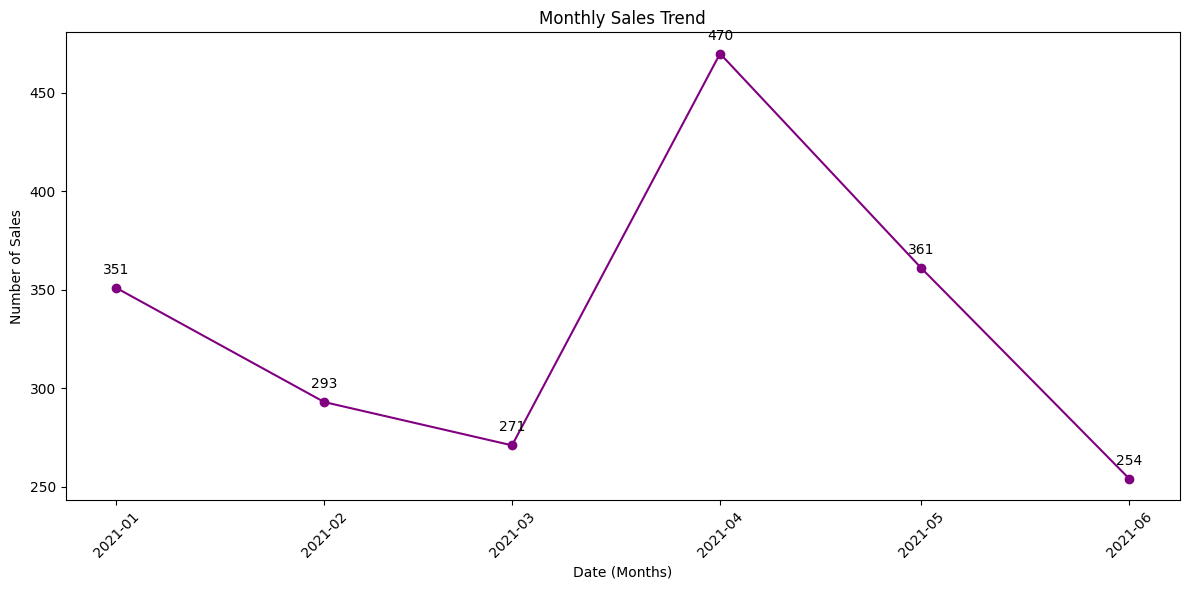


  date_of_sale  sales
0   2021-01-01    351
1   2021-02-01    293
2   2021-03-01    271
3   2021-04-01    470
4   2021-05-01    361
5   2021-06-01    254


In [ ]:
# @title
# 1. Analysising the sales trend on a monthly basis

# Convert date_of_sale to datetime if it's not already
data['date_of_sale'] = pd.to_datetime(data['date_of_sale'])

# Truncating the date filed into monthly then applying a count of records to pick sales per month,
# later assign a column head called sales for the counts
monthly_sales = data.groupby(data['date_of_sale'].dt.to_period("M")).size().reset_index(name='sales')

# converting the monthly truncated date column to date formart
monthly_sales['date_of_sale'] = monthly_sales['date_of_sale'].dt.to_timestamp()

# ploting a line chat for the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date_of_sale'], monthly_sales['sales'], marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Date (Months)')
plt.ylabel('Number of Sales')
# Rotating the x-axis labels to 45 degrees for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Adding labels to the points
for i, txt in enumerate(monthly_sales['sales']):
    plt.annotate(txt, (monthly_sales['date_of_sale'][i], monthly_sales['sales'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.savefig('monthly_sales_trend.png')
plt.show()
plt.close()

# printing the output for the monthly_sales variable
print("")
print(monthly_sales)

Key observations:
1. January to March: There is a noticeable decline in sales. Starting from around 350 sales in January, the numbers decrease steadily to 250 sales by March.
2. March to April: There is a significant spike in sales in April, where sales peak at nearly 450.
3. April to June: Post-April, there is a sharp decline again, with sales dropping back to around 250 by June.

The sales pattern is volatile with a major peak in April. This could be due to seasonal factors, promotional campaigns, or other market influences that need further investigation to understand the reasons behind such fluctuations.



In [ ]:
# @title
# Convert date_of_sale to datetime if it's not already
data['date_of_sale'] = pd.to_datetime(data['date_of_sale'])

# Group by date (monthly) and branch, then count the records
monthly_branch_sales = data.groupby([data['date_of_sale'].dt.to_period("M"), 'branch']).size().reset_index(name='sales')

# Convert the monthly truncated date column to datetime format
monthly_branch_sales['date_of_sale'] = monthly_branch_sales['date_of_sale'].dt.to_timestamp()

# Print the output for the monthly_branch_sales variable
print('Break Down of sales by Month at Branch Level')
print("")
print(monthly_branch_sales)

Break Down of sales by Month at Branch Level

   date_of_sale   branch  sales
0    2021-01-01  Bungoma    108
1    2021-01-01   Kisumu     52
2    2021-01-01   Migori     27
3    2021-01-01  Mombasa     42
4    2021-01-01  Nairobi    122
5    2021-02-01  Bungoma    145
6    2021-02-01   Kisumu     30
7    2021-02-01   Migori     25
8    2021-02-01  Mombasa     28
9    2021-02-01  Nairobi     65
10   2021-03-01  Bungoma    106
11   2021-03-01   Kisumu     31
12   2021-03-01   Migori     29
13   2021-03-01  Mombasa     28
14   2021-03-01  Nairobi     77
15   2021-04-01  Bungoma    128
16   2021-04-01   Kisumu     50
17   2021-04-01   Migori     74
18   2021-04-01  Mombasa     40
19   2021-04-01  Nairobi    178
20   2021-05-01  Bungoma    103
21   2021-05-01   Kisumu     45
22   2021-05-01   Migori     70
23   2021-05-01  Mombasa     33
24   2021-05-01  Nairobi    110
25   2021-06-01  Bungoma     71
26   2021-06-01   Kisumu     21
27   2021-06-01   Migori     48
28   2021-06-01  Mombasa  

### **2**. Analysing the payment behaviour

A bar chart below indicates the percentage of customers who are late to pay.


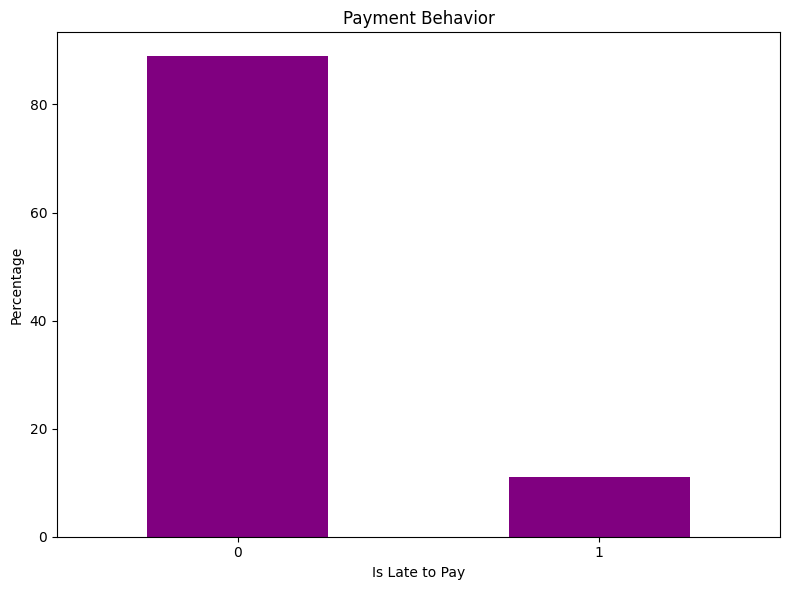


is_late_to_pay
0    88.9
1    11.1
Name: proportion, dtype: float64


In [ ]:
# @title
payment_behavior = data['is_late_to_pay'].value_counts(normalize=True) * 100

print("A bar chart below indicates the percentage of customers who are late to pay.")

plt.figure(figsize=(8, 6))
payment_behavior.plot(kind='bar',color='purple')
plt.title('Payment Behavior')
# Add titles and labels
plt.xlabel('Is Late to Pay')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
# Adjusting the layout to ensure everything fits without overlapping
plt.tight_layout()
# Show and Save Plot
plt.savefig('payment_behavior.png')
plt.show()
plt.close()

print("")
print(payment_behavior)

Key Observation:
1. The late payment rate is around 11.10%, indicating that a small portion of customers are not paying on time.

### **3.** Dive into correlation between payment_actual and payment_delay

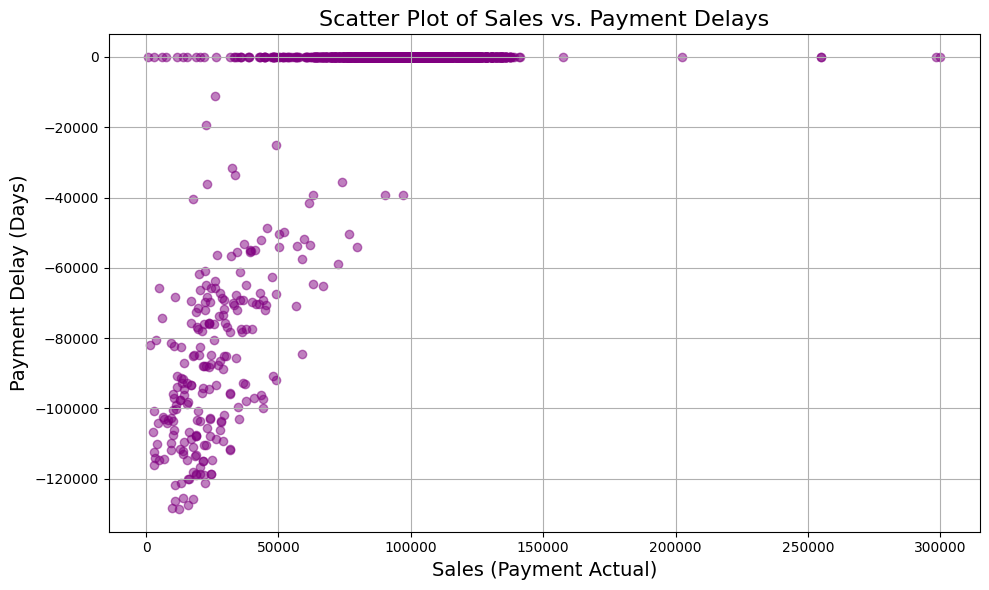


The correlation between sales and Payment Delays is: 0.720803316886204



In [ ]:
# @title
# Calculate the correlation between payment_actual and payment_delay
# Note: I negated the data['payment_delay'] because its a debt though a negative in that aspect
correlation = data['payment_actual'].corr(-data['payment_delay'])

# Plotting a Scatter plot for the correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['payment_actual'], -data['payment_delay'], color='purple', alpha=0.5)

# Add titles and labels
plt.title('Scatter Plot of Sales vs. Payment Delays', fontsize=16)
plt.xlabel('Sales (Payment Actual)', fontsize=14)
plt.ylabel('Payment Delay (Days)', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show and Save Plot
plt.show()
plt.savefig('sales_vs_payment_delay_scatter.png')
plt.close()

# Output the correlation value
print(f'''
The correlation between sales and Payment Delays is: {correlation}
''')

Key observations:
1. The correlation between sales (payment_actual) and payment delays is approximately 0.721. This indicates a strong positive correlation between the two variables.
2. Scatter Pattern shows a clear upward trend, confirming the positive correlation. As sales increase, there's a tendency for payment delays to increase as well.
3. Concentration of Data, Most of the data points are clustered in the lower left corner of the plot, suggesting that the majority of sales and payment delays are relatively small.
4. There are several outliers visible in the upper right portion of the plot. These represent instances of high sales amounts with correspondingly high payment delays.

Recommendations:
* Risk Assessment,higher sales amounts are associated with higher payment delays. This implies that larger transactions might carry more risk in terms of timely payments.
* The company might need to review its credit policies, especially for larger transactions. Consider implementing stricter credit checks or requiring partial upfront payments for high-value sales.

### **4.** Model Performance and Repayment Rates

In [ ]:
# @title
# 4. Model Performance and Repayment Rates
model_performance = data.groupby('model').agg({
    'payment_actual': 'sum',
    'is_late_to_pay': 'mean',
    'payment_delay': 'sum'
}).sort_values('payment_actual', ascending=False) #.head(10)

print(model_performance)

                     payment_actual  is_late_to_pay  payment_delay
model                                                             
BM 150                     37250726        0.153646        5331092
BM 100                     32565757        0.079670        2499685
HLX 100CC KS               21813386        0.043307         771664
HLX 125CC Refresh          19971023        0.058252        1141462
HLX 150CC (5 Gears)        19263184        0.156098        2907533
HLX 100CC ES PLUS          12032674        0.111111        1333232
HLX 150CC ES               10815355        0.160714        1805333
HLX 150X                    4644657        0.083333         250740
STAR 100CC KS               3631213        0.025000          53847
150-KD                      3139822        0.243902         677776
HLX 150X (5 Gears)          2939052        0.115385         313853
BM X150                     2631137        0.068966         212751
BM X125                     1959593        0.142857         33

Key observations:
1. BM 150 and BM 100 are top sellers but have different late payment rates (15.36% vs 7.97%).
2. HLX 100CC KS has good sales with a low late payment rate (4.33%).

Recommendations:
* Investigate why BM 150 has a higher late payment rate and consider adjusting credit terms for this model.
* Consider promoting HLX 100CC KS - model more or using its sales strategy for other models


### **5.** Branch Performance Analysis

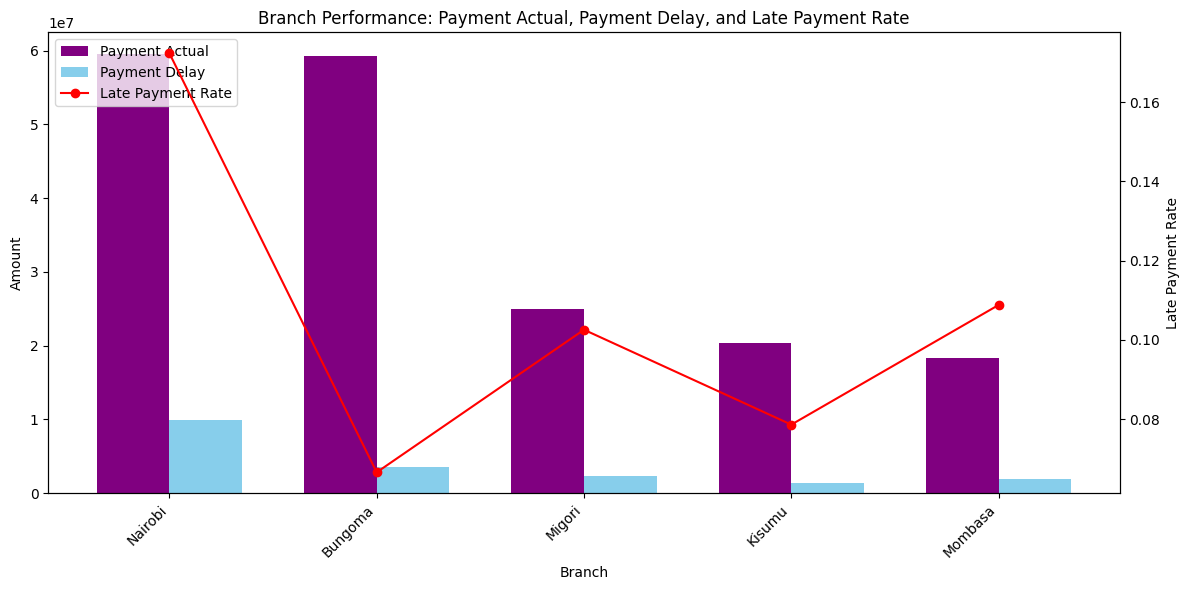

Branch Performance Data:
         payment_actual  is_late_to_pay  payment_delay
branch                                                
Nairobi        59496230        0.172360        9900278
Bungoma        59234611        0.066566        3541604
Migori         24988220        0.102564        2404852
Kisumu         20358714        0.078603        1329388
Mombasa        18315854        0.108808        1892955


In [ ]:
# @title
# 5. Branch Performance Analysis
branch_performance = data.groupby('branch').agg({
    'payment_actual': 'sum',
    'is_late_to_pay': 'mean',
    'payment_delay': 'sum'
}).sort_values('payment_actual', ascending=False)

# Create the combo chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for payment_actual and payment_delay
x = range(len(branch_performance.index))
width = 0.35

ax1.bar(x, branch_performance['payment_actual'], width, label='Payment Actual', color='purple')
ax1.bar([i + width for i in x], branch_performance['payment_delay'], width, label='Payment Delay', color='skyblue')

ax1.set_xlabel('Branch')
ax1.set_ylabel('Amount')
ax1.set_title('Branch Performance: Payment Actual, Payment Delay, and Late Payment Rate')
ax1.set_xticks([i + width/2 for i in x])
ax1.set_xticklabels(branch_performance.index, rotation=45, ha='right')

# Secondary y-axis for is_late_to_pay
ax2 = ax1.twinx()
ax2.plot([i + width/2 for i in x], branch_performance['is_late_to_pay'], color='red', marker='o', label='Late Payment Rate')
ax2.set_ylabel('Late Payment Rate')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()
plt.savefig('branch_performance_combo_chart.png')
plt.close()

print("Branch Performance Data:")
print(branch_performance.to_string())

Key observations:


1. Nairobi and Bungoma are the top-performing branches in terms of total payments received (payment_actual), with very similar amounts.
2. Despite similar payment amounts, Nairobi has a higher late payment rate (17.24%) compared to Bungoma (6.66%). This suggests that while Nairobi is generating high sales, it's struggling with timely collections.
3. Migori, Kisumu, and Mombasa have lower total payments but also show varying late payment rates:
  * Migori: 10.26%
  * Mombasa: 10.88%
  * Kisumu: 7.86%

Recommendations:
* Investigate Nairobi's high late payment rate: Despite high sales, the branch is struggling with collections. Consider implementing stricter credit checks or improved collection processes.
* Learn from Bungoma's success: Study the credit assessment and collection practices in the Bungoma branch and consider implementing them in other branches, especially Nairobi.
* Focus on improving collection efficiency in Migori and Mombasa: These branches have moderate late payment rates that could be improved.
* Maintain Kisumu's performance: While its total payments are lower, it has a relatively low late payment rate. Consider strategies to increase sales while maintaining the good collection rate.
* Implement targeted strategies: Use this data to create branch-specific strategies that address the unique challenges and opportunities in each location.
